### Exercise 3.1

The UC Irvine Machine Learning Repository contains a data set related to glass identification.  The data consist of 214 glass samples labeled as one of seven class categories. There are nine predictors, including the refractive index and percentages of eight elements: Na, Mg, Al, Si, K, Ca, Ba, and Fe.

(a) Using visualizations, explore the predictor variables to understand their
distributions as well as the relationships between predictors.

(b) Do there appear to be any outliers in the data? Are any predictors skewed?

(c) Are there any relevant transformations of one or more predictors that
might improve the classification model?


Let's first load the glass data set into a pandas data frame. 

In [2]:
import pandas as pd


In [32]:
%matplotlib inline

In [3]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 4646-A97D

 Directory of C:\Users\shuwie\Documents\GitHub\APM\Chapter 3

03/11/2018  08:31 PM    <DIR>          .
03/11/2018  08:31 PM    <DIR>          ..
03/11/2018  08:31 PM    <DIR>          .ipynb_checkpoints
03/11/2018  08:20 PM             1,514 Exercise 3-1.ipynb
03/11/2018  08:15 PM            11,903 glass.data
03/11/2018  08:15 PM             3,506 glass.names
               3 File(s)         16,923 bytes
               3 Dir(s)  51,813,515,264 bytes free


In [20]:
glass_names = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]

In [25]:
glass_df = pd.read_csv(filepath_or_buffer='glass.data', delimiter=',', names=glass_names)

In [26]:
glass_df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


In [27]:
glass_df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [36]:
import seaborn as sns

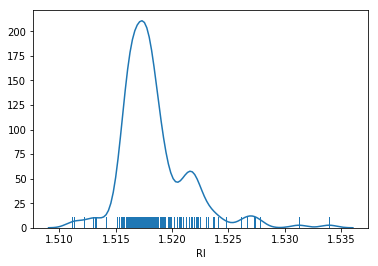

In [50]:
sns.distplot(glass_df.RI, hist=False, rug=True);

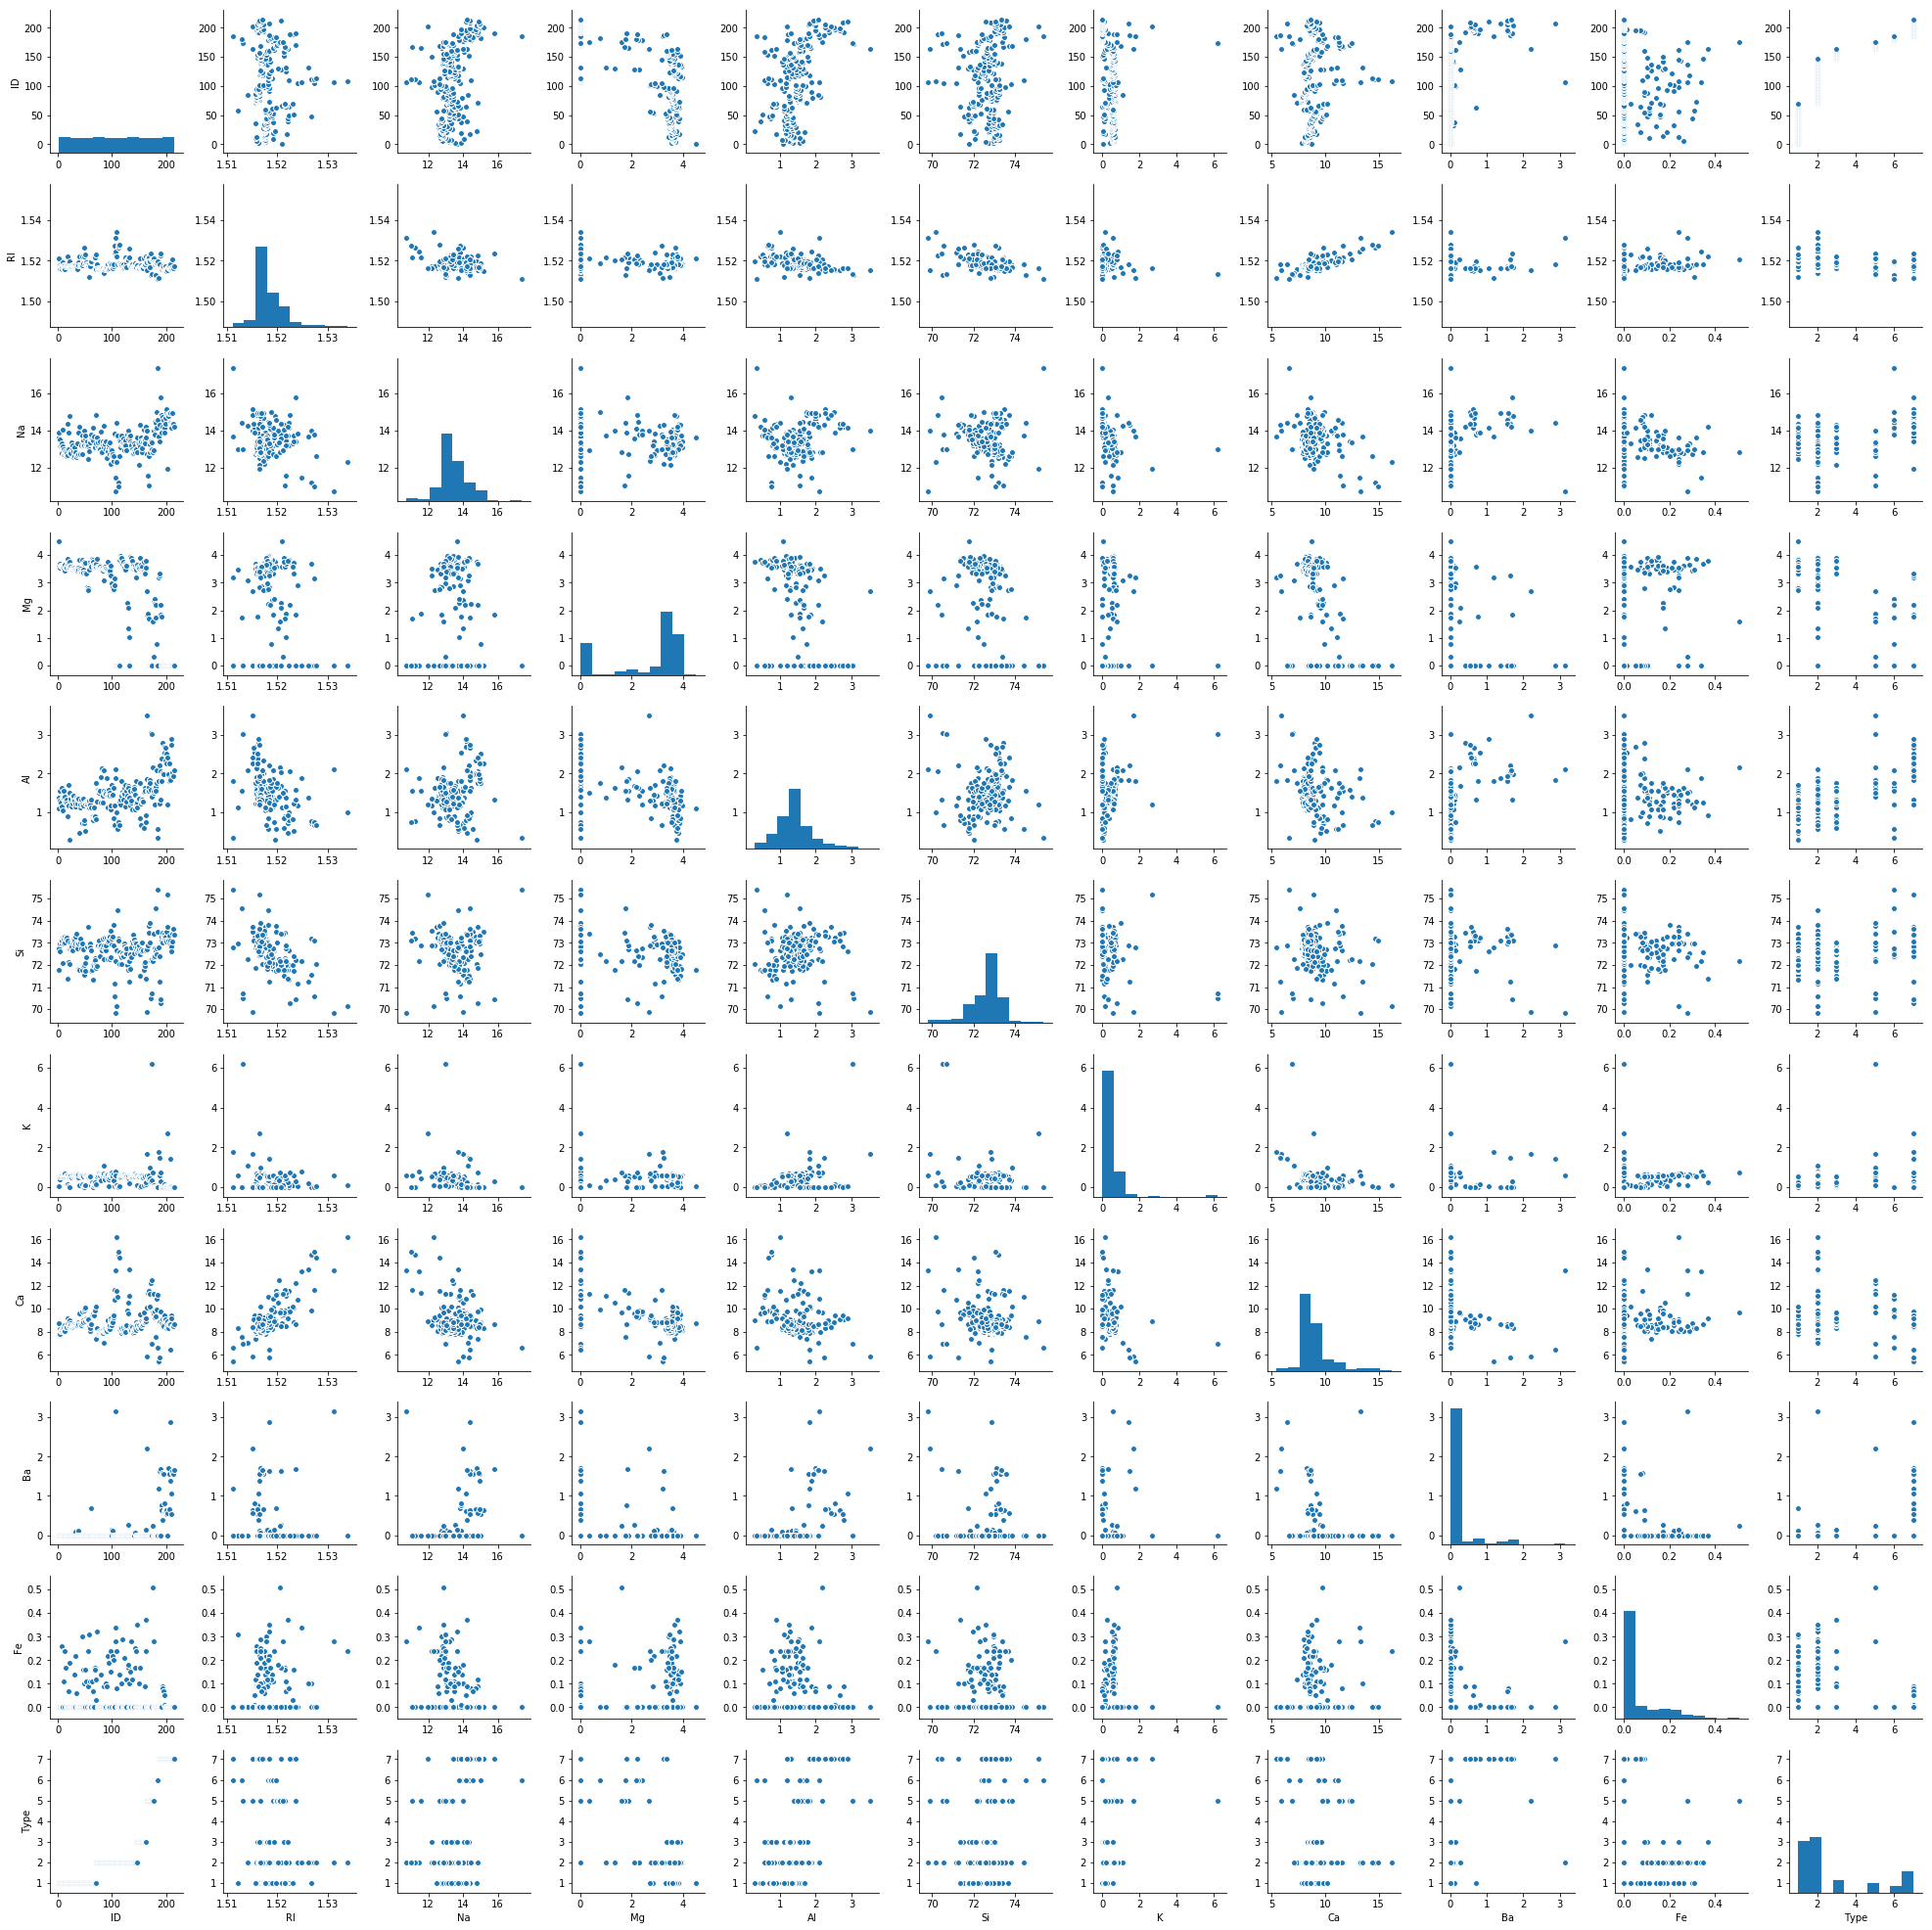

In [42]:
sns.pairplot(glass_df)